### Titanic Disaster  - Survival Prediction
------------------------------
Predict which passengers survived the tragedy.

In [86]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SETTINGS
%matplotlib inline
plt.style.use('seaborn')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [87]:
train = pd.read_csv('train.csv')

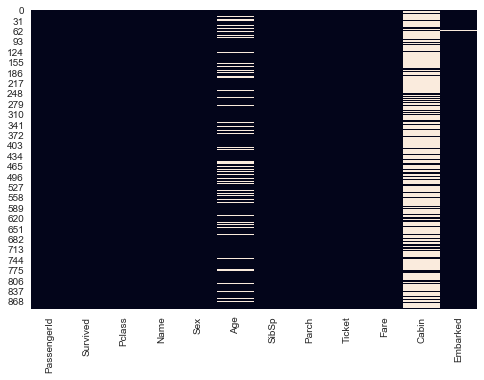

In [88]:
sns.heatmap(train.isnull(), cbar=False)

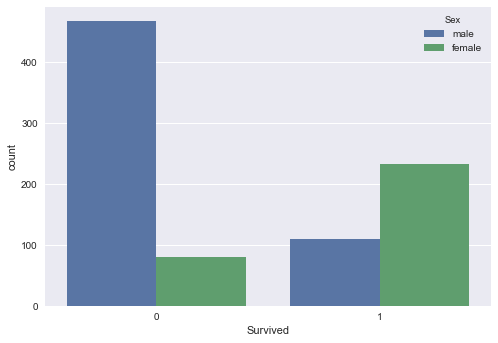

In [89]:
ax = sns.countplot(x='Survived', hue='Sex', data=train)

In [90]:
train.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

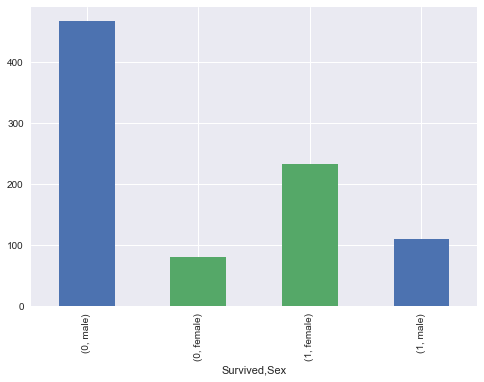

In [98]:
train.groupby('Survived')['Sex'].value_counts().plot(kind='bar', color=['C0','C1','C1','C0'])